<a href="https://colab.research.google.com/github/Taeyoungleee/ComputerVision_Seminar/blob/main/practice/CV_seminar_week3_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
# 현재 경로를 앞으로 진행할 프로젝트 디렉토리로 이동한다.
%cd /content/drive/MyDrive/CV_seminar_project

/content/drive/MyDrive/CV_seminar_project


In [ ]:
pwd

'/content/drive/MyDrive/CV_seminar_project'

In [ ]:
import glob
'''glob 함수를 이용하면, 해당 경로에 있는 파일들의 경로를 전부 리스트로 얻어올 수 있습니다. glob 라이브러리를 이용하여 이번 과제를 해결해주세요.'''
dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list}
for key in dic.keys():
  print(f'{key}이미지가 ',len(dic[key]), '개 있습니다.')
print('------------------------------------------------------------------------')

length_list = []
for key in dic.keys():
  print(f'{key}이미지는 trian, valid, test셋에 대해 ',int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1), '개씩 배정해주세요.')
  length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)])

length_list

dolphin이미지가  373 개 있습니다.
shark이미지가  488 개 있습니다.
whale이미지가  451 개 있습니다.
------------------------------------------------------------------------
dolphin이미지는 trian, valid, test셋에 대해  261 74 37 개씩 배정해주세요.
shark이미지는 trian, valid, test셋에 대해  341 97 48 개씩 배정해주세요.
whale이미지는 trian, valid, test셋에 대해  315 90 45 개씩 배정해주세요.


[[261, 74, 37], [341, 97, 48], [315, 90, 45]]

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage
%matplotlib inline

dolphin = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')


In [ ]:
def read_img(file_path):
  img_arr = cv2.imread(file_path)
  return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [ ]:
import random
img_arrs = []
img_num = range(0,300)

for i in random.sample(img_num, 3):

  img_arrs.append(read_img(dolphin[i]))
  img_arrs.append(read_img(shark[i]))
  img_arrs.append(read_img(whale[i]))

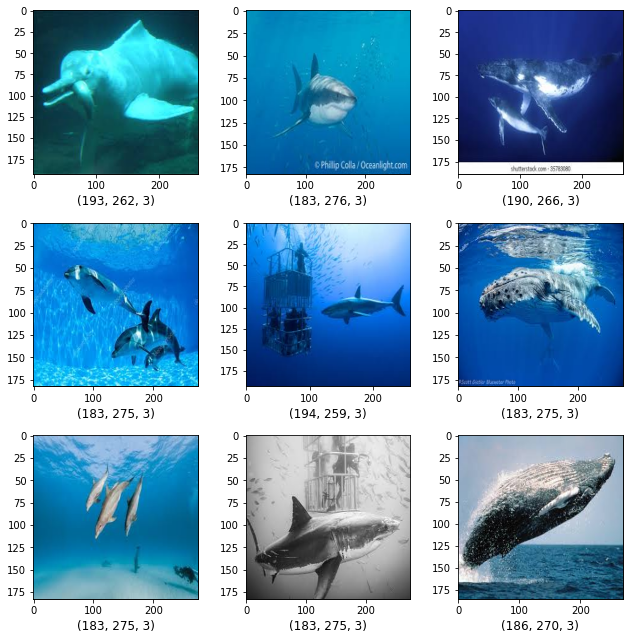

In [ ]:
rows = 3
columns =3

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

for num in range(1, rows*columns+1):

  fig.add_subplot(rows, columns, num)
  idx = num - 1

  plt.imshow(img_arrs[idx], aspect='auto')
  plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout()


for idx, ax in enumerate(axes.flat):
  ax.set_xticks([])
  ax.set_yticks([])

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage
%matplotlib inline

dolphin = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

In [ ]:
image_1 = cv2.imread(dolphin[0])

In [ ]:
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

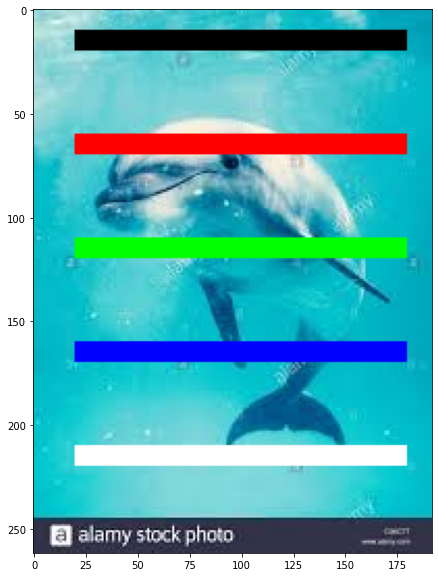

In [ ]:
fig = plt.figure(figsize=(10,10))

for x in range(20,180):
  for y in range(10, 20):
    image_1[y, x] = (0, 0, 0)


for x in range(20,180):
  for y in range(60, 70):
    image_1[y, x] = (255, 0, 0)


for x in range(20,180):
  for y in range(110, 120):
    image_1[y, x] = (0, 255, 0)


for x in range(20,180):
  for y in range(160, 170):
    image_1[y, x] = (0, 0, 255)


for x in range(20,180):
  for y in range(210, 220):
    image_1[y, x] = (255, 255, 255)


plt.imshow(image_1)

# 더 좋은 코드

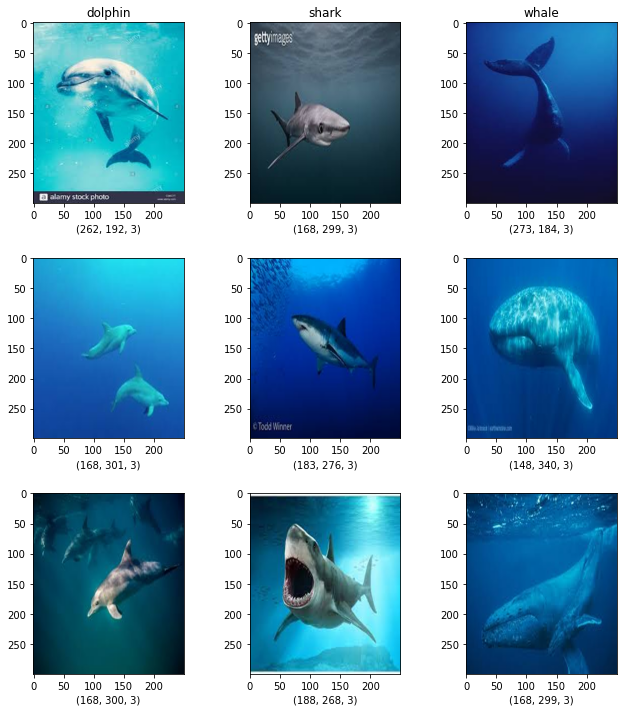

In [ ]:
fig = plt.figure(figsize=(9,10))
[ax1,ax2,ax3] = fig.subplots(3,3)

dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list}

for num, filename in enumerate(dic.values()):
  img = cv2.imread(filename[num])
  ax1[num].set_xlabel(img.shape)
  res = cv2.resize(img, dsize=(250,300), interpolation=cv2.INTER_CUBIC)
  ax1[num].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
  ax1[num].set_title(list(dic.keys())[num])

  img = cv2.imread(filename[num+1])
  ax2[num].set_xlabel(img.shape)
  res = cv2.resize(img, dsize=(250,300), interpolation=cv2.INTER_CUBIC)
  ax2[num].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
  

  img = cv2.imread(filename[num+2])
  ax3[num].set_xlabel(img.shape)
  res = cv2.resize(img, dsize=(250,300), interpolation=cv2.INTER_CUBIC)
  ax3[num].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
  
  
plt.tight_layout(h_pad=2, w_pad=3)

In [ ]:
import random
random.choice(dolphin_img_list)

'/content/drive/MyDrive/CV_seminar_project/original/dolphin/dolphin_028.jpg'

In [ ]:
print(img.shape[0])
print(img.shape)

168
(168, 299, 3)


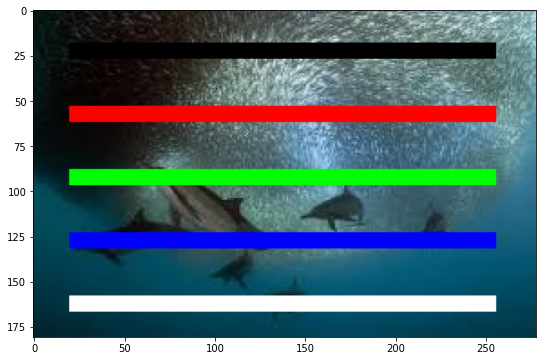

In [ ]:
import random

img = cv2.imread(random.choice(dolphin_img_list)) # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color_list = [[0, 0, 0], [0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 255]]

H_interval = int(img.shape[0]*0.1)
W_interval = int(img.shape[1]*0.1)

for i in range(len(color_list)):
    img[H_interval + (35*i) : W_interval + (35*i)][ : , 20:256] = color_list[i]

fig = plt.figure(figsize=(9,10))
ax1 = fig.subplots()                                              
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))